In [10]:
import os
import numpy as np
import matplotlib as mpl
from pyDOE import lhs
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
#import plotting #this should be where plotting.py is saved relative to current directory; it is no longer necessary
import matplotlib.pyplot as plt


In [20]:
#this ipython file plots the actual solution to burgers equation (provided by burgers_shock.mat), the predicted solution saved in a .mat dictionary with keys 'sol' (the predicted solution) and 'data' (the training data points) 
#this should be the .mat file outputted by cluster; it contains solution data as well as training set data
inputs = 'solution_int_data10_9990.mat'


#Enter numbers between 0 and 1 here. They represent the proportion of the graph to cut out. For example. Tmin = .5 and Tmax = .75 means that only the third quarter of the graph along the t-axis will be shown
#alternatively, t and x values entered directly into the functions should satisfy 0 \leq t \leq 100 and 0 \leq x \leq 256
Xmin = .4
Xmax = .55
Tmin = .9
Tmax = 1


Xmin = round(256*Xmin)
Xmax = round(256*Xmax) - 1
Tmin = round(100*Tmin)
Tmax = round(100*Tmax) - 1


#Directory where plots will be saved
base_plt_dir = './'

In [21]:
#retrieving prediction data from inputs
prediction_data = scipy.io.loadmat(inputs)
u_pred = prediction_data['sol']     #variable "u_pred" is the predicted solution with noise added, given by data in variable "inputs" (cell 2)
training_data = prediction_data['data']

#preparing solution data
data = scipy.io.loadmat('burgers_shock.mat')
x = data['x']
t = data['t']
Exact = np.real(data['usol'])
lb = np.array([-5.0, 0.0])
ub = np.array([5.0, np.pi / 2])
N_f = 5000
X, T = np.meshgrid(x, t)
u_star = Exact.flatten()[:, None]
X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
u = Exact.T.flatten()[:,None]    #variable "u" is the actual solution


In [22]:
#defining plotting functions

def create_plot(data, title, filename, tmin = 0, tmax = 99, xmin = 0, xmax = 255) :
    fig, ax = newfigure(1.0, 1.1)
    ax.axis('off')

    U_data = griddata(X_star, data.flatten(), (X,T), method='cubic')
    U_data = U_data[tmin:tmax + 1, xmin:xmax + 1]
    
    #######  ##################
    gs0 = gridspec.GridSpec(1, 2)
    gs0.update(top=1 - 0.06, bottom=1 - 1 / 3, left=0.15, right=0.85, wspace=0)
    ax = plt.subplot(gs0[:, :])
    
    mint = round(t[tmin][0], 2)
    maxt = round(t[tmax][0], 2)
    minx = round(x[xmin][0], 2)
    maxx = round(x[xmax][0], 2)
    t_1 = round((3*mint + maxt)/4, 2)
    t_2 = round((mint + maxt)/2, 2)
    t_3 = round((mint + 3*maxt)/2, 2)
    x_mid = round((minx+maxx)/2, 2)
    #axes = plt.gca()
    #ax.set_xlim([.5, .75])
    #ax.set_ylim([.3,.4])
    print(mint, maxt, minx, maxx)
    h = ax.imshow(U_data.T, interpolation='nearest', cmap='rainbow',
                  extent=[t.min(), t.max(), x.min(), x.max()],
                  origin='lower', aspect='auto')
    #h = ax.imshow(U_data.T, interpolation='nearest', cmap='rainbow', extent=[0, 10, 2, 10], origin='lower', aspect='auto')
    #ax.set_xticklabels(['', mint, (3*mint + maxt)/4, (mint + maxt)/2, (mint + 3*maxt)/4, maxt])
    ax.set_xticklabels(['  ' + str(mint), '        ' + str(t_1), '                 ' + str(t_2), '                      ' + str(t_3), '                              ' + str(maxt)])
    #ax.set_yticklabels(['', minx, (minx+maxx)/2, maxx])
    ax.set_yticklabels([minx, x_mid, maxx])
    #ax.set_xticklabels([mint, t_1, t_2, t_3, maxt])

    divider = make_axes_locatable(ax)

    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(h, cax=cax)

    #ax.plot(training_data[:, 1], training_data[:, 0], 'kx', label='Data (%d points)' % (training_data.shape[0]), markersize=4, clip_on=False)
    
    line = np.linspace(x.min(), x.max(), 2)[:, None]
    ax.plot(t[25] * np.ones((2, 1)), line, 'w-', linewidth=1)
    ax.plot(t[50] * np.ones((2, 1)), line, 'w-', linewidth=1)
    ax.plot(t[75] * np.ones((2, 1)), line, 'w-', linewidth=1)

    

    ax.set_xlabel('$t$')
    ax.set_ylabel('$x$')
    ax.legend(frameon=False, loc='best')
    ax.set_title(title, fontsize=10)

    file_targ = os.path.expanduser("{}/{}.eps".format(base_plt_dir, filename))
    plt.savefig(file_targ)
    print("created {}".format(file_targ))

    
    
def newfigure(width, nplots=1):
    fig = plt.figure(figsize=figsize(width, nplots))
    ax = fig.add_subplot(111)
    return fig, ax


def savefigure(filename, crop=True):
    if crop:
        plt.savefig('{}.pdf'.format(filename), bbox_inches='tight', pad_inches=0)
        plt.savefig('{}.eps'.format(filename), bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig('{}.pdf'.format(filename))
        plt.savefig('{}.eps'.format(filename))
        
def figsize(scale, nplots=1):
    fig_width_pt = 390.0  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = nplots * fig_width * golden_mean  # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

No handles with labels found to put in legend.


0.0 0.99 -1.0 1.0
created .//burgers_solution.eps


No handles with labels found to put in legend.


0.9 0.99 -0.2 0.1
created .//burgers_solution_zoom.eps


No handles with labels found to put in legend.


0.0 0.99 -1.0 1.0
created .//predicted_solution.eps


No handles with labels found to put in legend.


0.9 0.99 -0.2 0.1
created .//predicted_solution_zoom.eps


No handles with labels found to put in legend.


0.0 0.99 -1.0 1.0
created .//predicted_error.eps


No handles with labels found to put in legend.


0.9 0.99 -0.2 0.1
created .//predicted_error_zoom.eps


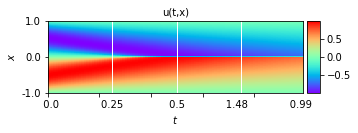

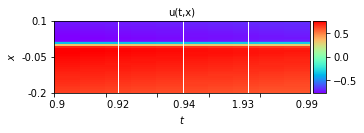

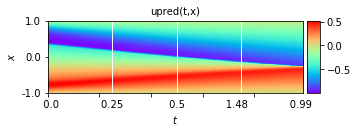

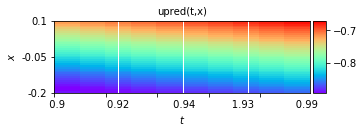

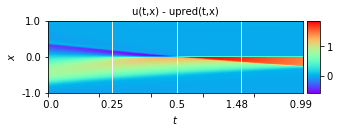

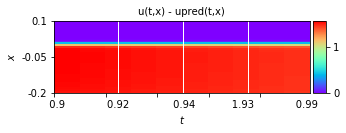

In [23]:
#Graphing the actual solution
create_plot(u, "u(t,x)", 'burgers_solution')

#Graphing the actual solution, zoomed in
create_plot(u, "u(t,x)", 'burgers_solution_zoom', Tmin, Tmax, Xmin, Xmax)





#Graphing the predicted solution
create_plot(u_pred, "upred(t,x)", 'predicted_solution')

#Graphing the predicted solution, zoomed in
create_plot(u_pred, "upred(t,x)", 'predicted_solution_zoom', Tmin, Tmax, Xmin, Xmax)






#Graphing the error
create_plot(u - u_pred, "u(t,x) - upred(t,x)", 'predicted_error')

#Graphing the error, zoomed in
create_plot(u-u_pred, "u(t,x) - upred(t,x)", 'predicted_error_zoom', Tmin, Tmax, Xmin, Xmax)